In [14]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'Euro_1960_2020.csv')

# Preprocess the data
df.fillna(0, inplace=True)

# Identify host nation matches (either home or away team is the host)
df['is_host'] = df.apply(lambda row: row['home_team_code'] == row['stadium_country_code'] or row['away_team_code'] == row['stadium_country_code'], axis=1)

# Encode round mode (assuming 'round_mode' has string values like 'Group Stage', 'Quarter-Finals', etc.)
round_mapping = {
    'GROUP_STANDINGS': 1,
    'ROUND_OF_16': 2,
    'QUARTER_FINALS': 3,
    'SEMIFINAL': 4,
    'THIRD_PLAY_OFF': 4.5,
    'FINAL': 5
}

df['round_encoded'] = df['round'].map(round_mapping)

In [17]:
# Calculate total goals scored in the match
df['goals_scored'] = df['home_score'] + df['away_score']

# Separate data into host and non-host matches
host_goals = df[df['is_host']]['goals_scored']
non_host_goals = df[~df['is_host']]['goals_scored']

host_attendance = df[df['is_host']]['match_attendance']
non_host_attendance = df[~df['is_host']]['match_attendance']

host_round_mode = df[df['is_host']]['round_encoded']
non_host_round_mode = df[~df['is_host']]['round_encoded']

# Perform ANOVA for goals scored
anova_goals = f_oneway(host_goals, non_host_goals)
print(f'ANOVA for Goals Scored: F={anova_goals.statistic:.4f}, p={anova_goals.pvalue:.4f}')

# Perform ANOVA for attendance
anova_attendance = f_oneway(host_attendance, non_host_attendance)
print(f'ANOVA for Attendance: F={anova_attendance.statistic:.4f}, p={anova_attendance.pvalue:.4f}')

# Perform ANOVA for round mode
anova_round_mode = f_oneway(host_round_mode, non_host_round_mode)
print(f'ANOVA for Round Mode: F={anova_round_mode.statistic:.4f}, p={anova_round_mode.pvalue:.4f}')



ANOVA for Goals Scored: F=0.0016, p=0.9680
ANOVA for Attendance: F=10.3330, p=0.0014
ANOVA for Round Mode: F=2.6219, p=0.1063


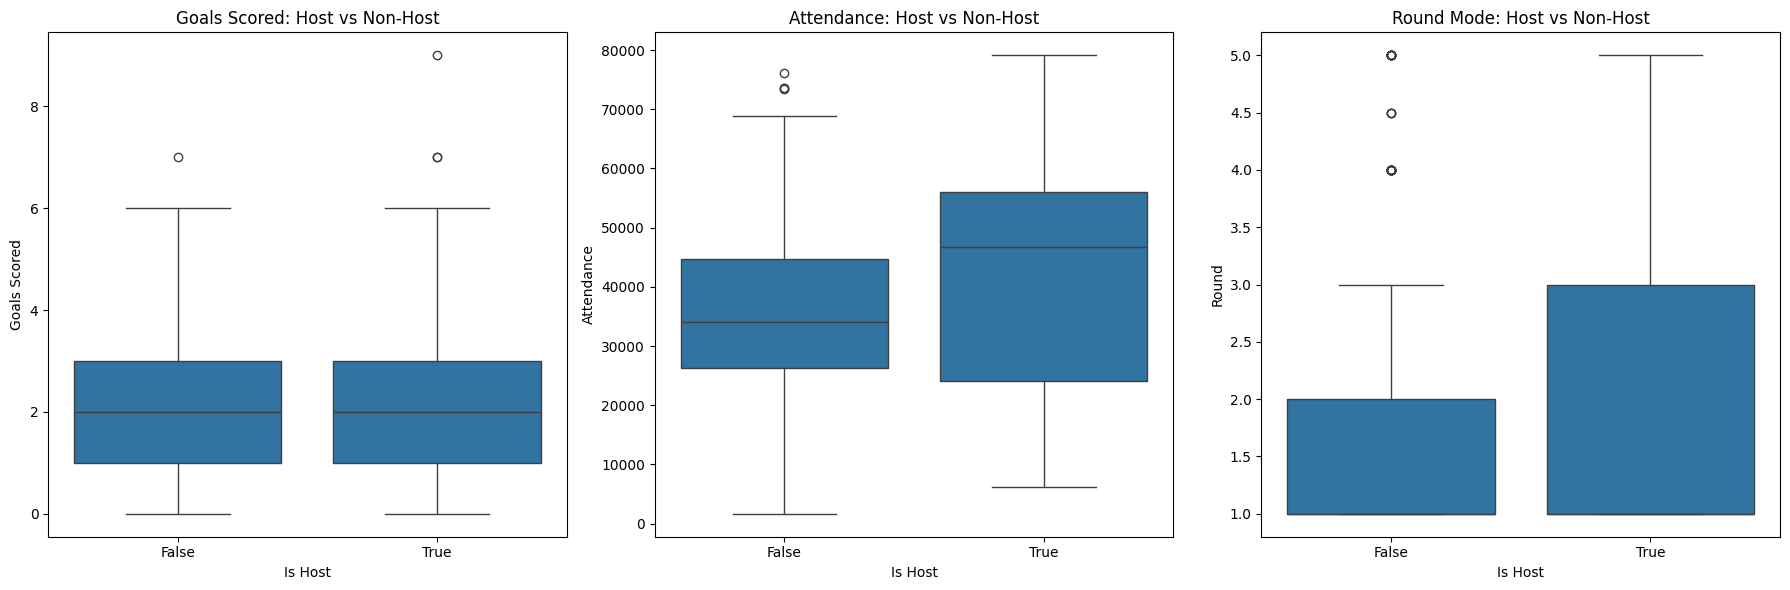

In [16]:
# Visualize the results using box plots
plt.figure(figsize=(18, 6))

# Plot goals scored
plt.subplot(1, 3, 1)
sns.boxplot(x='is_host', y='goals_scored', data=df)
plt.title('Goals Scored: Host vs Non-Host')
plt.xlabel('Is Host')
plt.ylabel('Goals Scored')

# Plot attendance
plt.subplot(1, 3, 2)
sns.boxplot(x='is_host', y='match_attendance', data=df)
plt.title('Attendance: Host vs Non-Host')
plt.xlabel('Is Host')
plt.ylabel('Attendance')

# Plot round mode
plt.subplot(1, 3, 3)
sns.boxplot(x='is_host', y='round_encoded', data=df)
plt.title('Round Mode: Host vs Non-Host')
plt.xlabel('Is Host')
plt.ylabel('Round')

plt.tight_layout()
plt.show()